In [1]:
!pip install opencv-python opencv-contrib-python

In [6]:
import os

prototxt_path = "C:/Users/menak/CLG/CV/MobileNetSSD_deploy.prototxt"
caffemodel_path = "C:/Users/menak/CLG/CV/MobileNetSSD_deploy.caffemodel"

print("Prototxt exists:", os.path.exists(prototxt_path))
print("Caffemodel exists:", os.path.exists(caffemodel_path))

Prototxt exists: True
Caffemodel exists: True


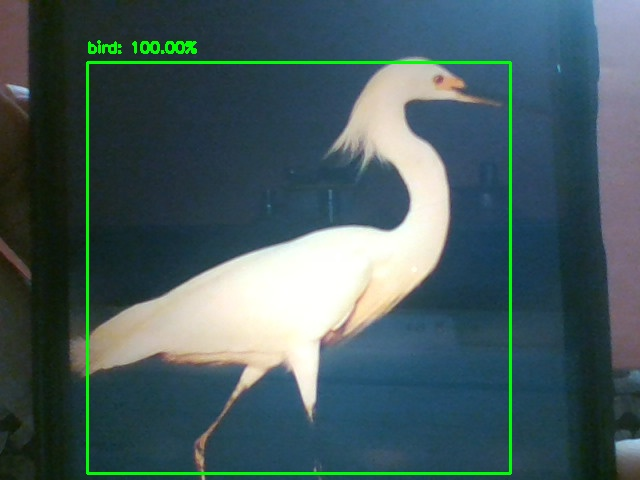

Stopping after 10 seconds...

Final Captured Frame with Detections:


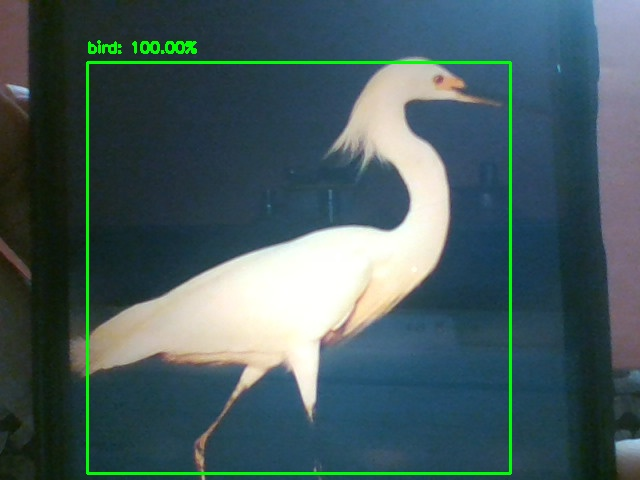

In [15]:
import cv2
import numpy as np
import time
import PIL.Image
import io
from IPython.display import display, clear_output

# Load pre-trained model and configuration file
prototxt_path = "C:/Users/menak/CLG/CV/MobileNetSSD_deploy.prototxt"
caffemodel_path = "C:/Users/menak/CLG/CV/MobileNetSSD_deploy.caffemodel"

net = cv2.dnn.readNetFromCaffe(prototxt_path, caffemodel_path)

# Define object classes
CLASSES = ["background", "aeroplane", "bicycle", "bird", "boat", "bottle", "bus",
           "car", "cat", "chair", "cow", "diningtable", "dog", "horse", "motorbike",
           "person", "pottedplant", "sheep", "sofa", "train", "tvmonitor", 'fox']

# Start video capture
cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print("Error: Could not open camera.")
    exit()

start_time = time.time()  # Track time
final_frame = None  # Store the last processed frame

while True:
    ret, frame = cap.read()
    if not ret:
        print("Error: Frame not captured.")
        break

    print("Frame Captured!")

    (h, w) = frame.shape[:2]
    blob = cv2.dnn.blobFromImage(cv2.resize(frame, (300, 300)), 0.007843, (300, 300), 127.5)
    net.setInput(blob)
    detections = net.forward()

    print("Detections Processed...")

    for i in range(detections.shape[2]):
        confidence = detections[0, 0, i, 2]
        if confidence > 0.2:  # Confidence threshold
            idx = int(detections[0, 0, i, 1])
            box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
            (startX, startY, endX, endY) = box.astype("int")
            label = f"{CLASSES[idx]}: {confidence * 100:.2f}%"

            # Draw bounding box and label on frame
            cv2.rectangle(frame, (startX, startY), (endX, endY), (0, 255, 0), 2)
            cv2.putText(frame, label, (startX, startY - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
            
            print(f"Detected: {CLASSES[idx]} with {confidence * 100:.2f}% confidence")

    # Convert frame to display in Jupyter Notebook
    _, buffer = cv2.imencode(".jpg", frame)
    img = PIL.Image.open(io.BytesIO(buffer))

    # Update display with new frame
    clear_output(wait=True)
    display(img)

    # Store final frame for display after the loop ends
    final_frame = img

    # Stop after 30 seconds
    if time.time() - start_time > 20:
        print("Stopping after 10 seconds...")
        break

cap.release()
cv2.destroyAllWindows()

# Display final frame with class and confidence
if final_frame:
    print("\nFinal Captured Frame with Detections:")
    display(final_frame)